### Importing the neaded libraries
### Setting up dataset and JSON file

In [1]:
import json
import os
import math
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

dataset = "coins"
json_file = "data.json"

###  Preparing the dataset

In [2]:
sr= 22050
duration = 30
samples = sr * duration

def extract_mfcc(dataset, file_json, num_mfcc=40, n_fft=1024, hop_length=512, num_segments=5):
    
    data = { "coin": [], "labels": [], "mfcc": []}
    samples_per_segment = int(samples / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset)):
        if dirpath is not dataset:
            semantic_label = dirpath.split("/")[-1]
            data["coin"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))
            
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=sr)
                for d in range(num_segments):
                    start = samples_per_segment * d
                    finish = start + samples_per_segment
                    
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))
                        

    with open(file_json, "w") as fp:
        json.dump(data, fp, indent=4)

In [3]:
extract_mfcc(dataset, json_file,  num_segments=20)


Processing: coins\0.020 DT
coins\0.020 DT\New Recording 43.wav, segment:1
coins\0.020 DT\New Recording 43.wav, segment:2
coins\0.020 DT\New Recording 46(1).wav, segment:1
coins\0.020 DT\New Recording 46(1).wav, segment:2
coins\0.020 DT\New Recording 46.wav, segment:1
coins\0.020 DT\New Recording 46.wav, segment:2


C:\Users\myrai\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=0
  warnings.warn(


coins\0.020 DT\New Recording 47(1).wav, segment:1
coins\0.020 DT\New Recording 47(1).wav, segment:2
coins\0.020 DT\New Recording 47.wav, segment:1
coins\0.020 DT\New Recording 47.wav, segment:2
coins\0.020 DT\New Recording 48(1).wav, segment:1
coins\0.020 DT\New Recording 48(1).wav, segment:2
coins\0.020 DT\New Recording 48.wav, segment:1
coins\0.020 DT\New Recording 48.wav, segment:2
coins\0.020 DT\New Recording 49(1).wav, segment:1
coins\0.020 DT\New Recording 49(1).wav, segment:2
coins\0.020 DT\New Recording 49.wav, segment:1
coins\0.020 DT\New Recording 49.wav, segment:2
coins\0.020 DT\New Recording 50(1).wav, segment:1
coins\0.020 DT\New Recording 50(1).wav, segment:2
coins\0.020 DT\New Recording 50.wav, segment:1
coins\0.020 DT\New Recording 50.wav, segment:2
coins\0.020 DT\New Recording 51(1).wav, segment:1
coins\0.020 DT\New Recording 51(1).wav, segment:2
coins\0.020 DT\New Recording 51.wav, segment:1
coins\0.020 DT\New Recording 51.wav, segment:2
coins\0.020 DT\New Recording 5

C:\Users\myrai\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=169
  warnings.warn(


coins\0.100 DT\New Recording 27.wav, segment:1
coins\0.100 DT\New Recording 27.wav, segment:2
coins\0.100 DT\New Recording 28.wav, segment:1
coins\0.100 DT\New Recording 28.wav, segment:2
coins\0.100 DT\New Recording 29(1).wav, segment:1
coins\0.100 DT\New Recording 29(1).wav, segment:2
coins\0.100 DT\New Recording 29.wav, segment:1
coins\0.100 DT\New Recording 29.wav, segment:2
coins\0.100 DT\New Recording 31(1).wav, segment:1
coins\0.100 DT\New Recording 31(1).wav, segment:2
coins\0.100 DT\New Recording 31.wav, segment:1
coins\0.100 DT\New Recording 31.wav, segment:2
coins\0.100 DT\New Recording 32(1).wav, segment:1
coins\0.100 DT\New Recording 32(1).wav, segment:2
coins\0.100 DT\New Recording 32.wav, segment:1
coins\0.100 DT\New Recording 32.wav, segment:2
coins\0.100 DT\New Recording 33(1).wav, segment:1
coins\0.100 DT\New Recording 33(1).wav, segment:2
coins\0.100 DT\New Recording 33.wav, segment:1
coins\0.100 DT\New Recording 33.wav, segment:2
coins\0.100 DT\New Recording 34(1).w

### function for loading files from the data 

In [4]:
def load_data(dataset):
    with open(dataset, "r") as file:
        data = json.load(file)
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data loaded!")

    return X, y

### Loading and splitting the dataset
### Defining the neural network model
### Displaying model summary
### Training the model + solving overfitting 

In [5]:
def learning_curve(history):
    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

Data loaded!
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 2600)              0         
                                                                 
 dense_36 (Dense)            (None, 512)               1331712   
                                                                 
 dropout_17 (Dropout)        (None, 512)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 64)                16448     
                                                                 
 dropout_19 (Dropout)        (None, 64)  

5/5 [==============================] - 0s 32ms/step - loss: 4.5616 - accuracy: 0.5411 - val_loss: 2.0555 - val_accuracy: 0.6216
Epoch 49/100
5/5 [==============================] - 0s 37ms/step - loss: 3.0836 - accuracy: 0.6986 - val_loss: 1.9573 - val_accuracy: 0.7027
Epoch 50/100
5/5 [==============================] - 0s 36ms/step - loss: 3.9696 - accuracy: 0.6301 - val_loss: 1.9446 - val_accuracy: 0.7027
Epoch 51/100
5/5 [==============================] - 0s 32ms/step - loss: 3.4151 - accuracy: 0.6164 - val_loss: 2.1608 - val_accuracy: 0.6757
Epoch 52/100
5/5 [==============================] - 0s 33ms/step - loss: 3.9141 - accuracy: 0.6370 - val_loss: 2.1952 - val_accuracy: 0.6486
Epoch 53/100
5/5 [==============================] - 0s 34ms/step - loss: 4.1267 - accuracy: 0.5753 - val_loss: 2.0827 - val_accuracy: 0.7027
Epoch 54/100
5/5 [==============================] - 0s 33ms/step - loss: 3.8355 - accuracy: 0.6370 - val_loss: 1.9642 - val_accuracy: 0.7027
Epoch 55/100
5/5 [========

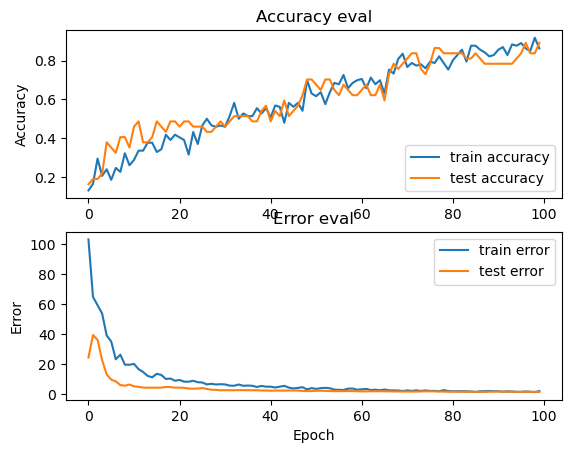

In [28]:
X, y = load_data(json_file)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = keras.Sequential([

        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    
        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.16),
    
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.16),
    
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.16),

        keras.layers.Dense(6, activation='softmax')
    ])

optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model.summary()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)
learning_curve(history)

In [21]:
def preprocess_audio(file_path):
    signal, sr = librosa.load(file_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40, hop_length=512, n_fft=1024)
    expected_time_steps = 65
    if mfcc.shape[1] < expected_time_steps:
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, expected_time_steps - mfcc.shape[1])), mode='constant')
        print(mfcc.shape[1])
    else:
        mfcc = mfcc[:, :expected_time_steps]
        print(mfcc.shape[1])
    return mfcc.T

In [22]:
with open(json_file, "r") as file:
        data = json.load(file)

In [23]:
audio_file_path = "0.5dt.wav"
input_features = preprocess_audio(audio_file_path)
input_features = np.expand_dims(input_features, axis=0)

predictions = model.predict(input_features)


predicted_class = np.argmax(predictions)


print(f"Predicted Class: {predicted_class}")
print(f"Class Name: {data['coin'][predicted_class]}")

65
1/1 [==============================] - 0s 95ms/step
Predicted Class: 2
Class Name: coins\0.500 DT


In [24]:
audio_file_path = "0.1dt.wav"
input_features = preprocess_audio(audio_file_path)
input_features = np.expand_dims(input_features, axis=0)

predictions = model.predict(input_features)


predicted_class = np.argmax(predictions)

print(f"Predicted Class: {predicted_class}")
print(f"Class Name: {data['coin'][predicted_class]}")

65
1/1 [==============================] - 0s 33ms/step
Predicted Class: 1
Class Name: coins\0.100 DT


In [25]:
audio_file_path = "0.02dt.wav"
input_features = preprocess_audio(audio_file_path)
input_features = np.expand_dims(input_features, axis=0)

predictions = model.predict(input_features)


predicted_class = np.argmax(predictions)

print(f"Predicted Class: {predicted_class}")
print(f"Class Name: {data['coin'][predicted_class]}")

65
1/1 [==============================] - 0s 37ms/step
Predicted Class: 0
Class Name: coins\0.020 DT


In [26]:
audio_file_path = "1dt.wav"
input_features = preprocess_audio(audio_file_path)
input_features = np.expand_dims(input_features, axis=0)

predictions = model.predict(input_features)


predicted_class = np.argmax(predictions)

print(f"Predicted Class: {predicted_class}")
print(f"Class Name: {data['coin'][predicted_class]}")

65
1/1 [==============================] - 0s 35ms/step
Predicted Class: 3
Class Name: coins\1 DT
